# Linear Regression

In this section, we will see how the customer clustors we have identitifed using PCA and KMeans clustering, predict profit and revenue

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [167]:
df = pd.read_csv("cleaned_data.csv") 

In [168]:
import pandas as pd
df_linear_reg = pd.read_csv("cluster_labels.csv") 

In [169]:
df_linear_reg['Customer Age'] = df['Customer Age']
df_linear_reg['Age Group'] = df['Age Group']

In [170]:
df_encoded = pd.get_dummies(df_linear_reg, columns=['Country', 'Product Category','Cluster','Age Group','State'], drop_first=False)

X = df_encoded[['Cluster_0','Cluster_1', 'Cluster_2', 'Cluster_3',
				]]
y = df_encoded['Revenue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R^2 Score: 0.019170108826130128
RMSE: 729.3893645170855


In [172]:
coef_df12 = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

display(coef_df12)


,Feature,Coefficient
2,Cluster_2,143.486218
1,Cluster_1,101.148623
0,Cluster_0,-133.549443
3,Cluster_3,-206.848004



While dividing customers into segments using PCA and K Means helped us identify meaningful shopper categories that can inform marketing strategies, the cluster labels alone are not strong predictors of revenue. 
With an R² of only 1.9%, the model does not do a great job of predicting revenue, likely because other important factors—such as quantity purchased, product type, or pricing—were not included. That said, the regression results show that Cluster 2 and Cluster 1 are associated with higher revenue transactions, while Cluster 0 and especially Cluster 3 tend to be linked to lower revenue.



In [173]:
df_raw = pd.read_csv("Data.csv")
df['Country'] = df_raw['Country']
df['State'] = df_raw['State']
df['Revenue'] = df_raw['Revenue']

In [185]:
df_encoded2 = pd.get_dummies(df,columns=['Country', 'Product Category','Age Group','State','Customer Gender'], drop_first=True)
df_encoded2['Customer Gender'] = df['Customer Gender']
df_encoded2['Revenue'] = df['Revenue']

Now I am going to be using Linear regression as an explanatory tool, not for prediction accuracy. 
Understanding how individual features (like age, gender, or category) affect revenue,
then R² is less important than interpretable coefficients and statistical significance. Understanding drivers of revenue. 

OLS stands for Ordinary Least Squares.
It’s a method used in linear regression to find the best-fitting line by minimizing the sum of squared errors between actual and predicted values.

Put simply:

OLS finds the line (or hyperplane) that best explains the relationship between your input variables (like age, gender, etc.) and the outcome (like revenue).





In [179]:

X = df_encoded2[['Age Group_25-34', 'Age Group_35-44', 'Age Group_45-54', 'Product Category_Bikes', 'Product Category_Clothing', 'Customer Gender_M']]
y = df_encoded2['Revenue']


X = X.apply(pd.to_numeric, errors='coerce')


X = X.dropna()
y = y.loc[X.index]


X = sm.add_constant(X, has_constant='add')


y = y.loc[X.index]


X = X.astype(float)
y = y.astype(float)


model_OLS = sm.OLS(y, X).fit()

print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     5288.
Date:                Sat, 03 May 2025   Prob (F-statistic):               0.00
Time:                        15:02:25   Log-Likelihood:            -2.6838e+05
No. Observations:               34866   AIC:                         5.368e+05
Df Residuals:                   34859   BIC:                         5.368e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Based on the p-values, all the variables except for "Age Group 25-34", and "Gender" are significant and predict revenue.  

Revenue is strongly predicted by product category (especially bikes and clothing). This can influence marketing efforts

Age Group 35-44 and 45-54 predict revenu the best.

Gender and age group 25–34 do not show a statistically significant effect.

# COEFFICIENT PLOT

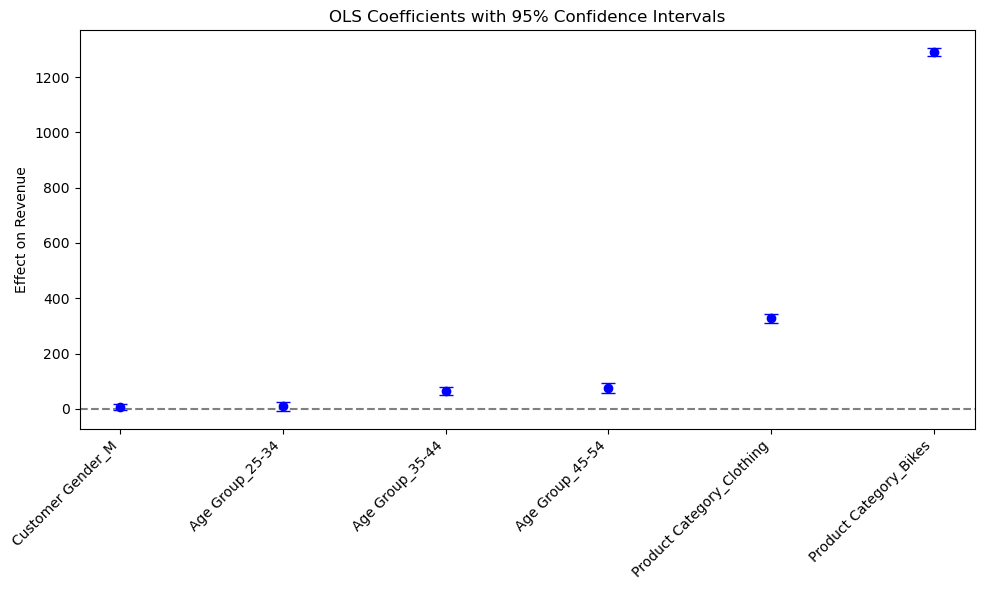

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Extract coefficients and confidence intervals
coefs_OLS = model_OLS.params
conf_OLS = model_OLS.conf_int()
conf_OLS.columns = ['lower_bound', 'upper_bound']

# Combine into one DataFrame
coef_df_OLS = pd.DataFrame({
    'coef': coefs_OLS,
    'lower_bound': conf_OLS['lower_bound'],
    'upper_bound': conf_OLS['upper_bound']
})

# Drop intercept for clarity (optional)
coef_df_OLS = coef_df_OLS.drop('const')

# Sort coefficients for cleaner plot
coef_df_OLS = coef_df_OLS.sort_values(by='coef')

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    coef_df_OLS.index,
    coef_df_OLS['coef'],
    yerr=[coef_df_OLS['coef'] - coef_df_OLS['lower_bound'], coef_df_OLS['upper_bound'] - coef_df_OLS['coef']],
    fmt='o',
    capsize=5,
    color='blue'
)
plt.axhline(0, color='gray', linestyle='--')
plt.title('OLS Coefficients with 95% Confidence Intervals')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Effect on Revenue')
plt.tight_layout()
plt.show()


The horizontal line at 0 = no effect

/var/folders/dh/q4w9n8hd753dx4bk6wslh32m0000gn/T/ipykernel_9052/416045138.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_encoded2, x='Product Category', y='Revenue', estimator='mean', ci='sd')


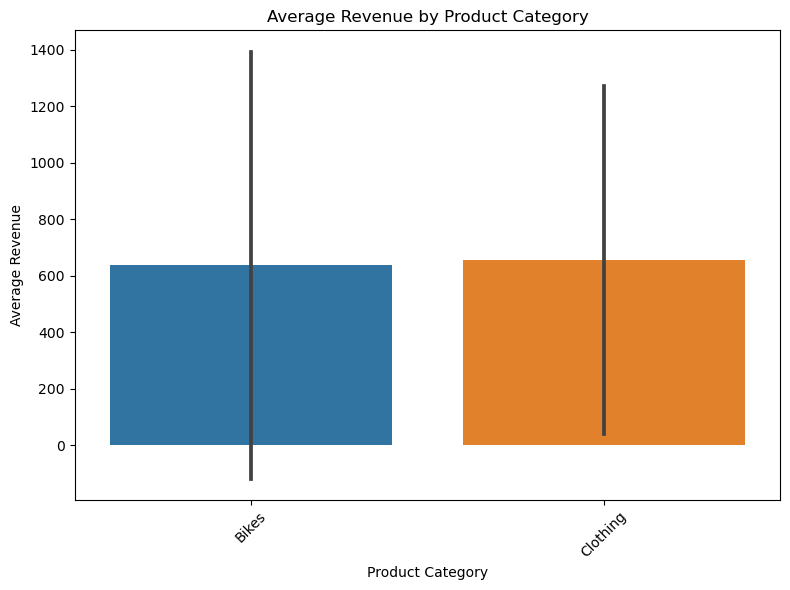

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Combine one-hot encoded columns into a single 'Product Category' column for visualization
df_encoded2['Product Category'] = df_encoded2[['Product Category_Bikes', 'Product Category_Clothing']].idxmax(axis=1).str.replace('Product Category_', '')

sns.barplot(data=df_encoded2, x='Product Category', y='Revenue', estimator='mean', ci='sd')
plt.title('Average Revenue by Product Category')
plt.ylabel('Average Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()